In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy

In [81]:
data = pd.read_csv('국민건강보험공단_건강검진정보_20211231.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   HCHK_YEAR          1000000 non-null  int64  
 1   IDV_ID             1000000 non-null  int64  
 2   SIDO               1000000 non-null  int64  
 3   SEX                1000000 non-null  int64  
 4   AGE_GROUP          1000000 non-null  int64  
 5   HEIGHT             1000000 non-null  int64  
 6   WEIGHT             1000000 non-null  int64  
 7   WAIST              999917 non-null   float64
 8   SIGHT_LEFT         999789 non-null   float64
 9   SIGHT_RIGHT        999790 non-null   float64
 10  HEAR_LEFT          999810 non-null   float64
 11  HEAR_RIGHT         999811 non-null   float64
 12  BP_HIGH            992655 non-null   float64
 13  BP_LWST            992655 non-null   float64
 14  BLDS               992588 non-null   float64
 15  TOT_CHOLE          425059 non-nul

In [82]:
data['SMK_STAT_TYPE_CD'].value_counts()

SMK_STAT_TYPE_CD
1.0    634160
2.0    182981
3.0    182489
Name: count, dtype: int64

In [83]:
data['SMK_STAT_TYPE_CD'].fillna(0, inplace=True)
#흡연자 그룹화
data['SMK_STAT_TYPE_CD'] = data['SMK_STAT_TYPE_CD'].replace({1: 0, 2: 1, 3: 1})
print(data['SMK_STAT_TYPE_CD'].value_counts())

SMK_STAT_TYPE_CD
0.0    634530
1.0    365470
Name: count, dtype: int64


# 콜레스테롤 관련 지표 분석

확인할 수 있는 콜레스테롤 지표 : TOT_CHOLE(총 콜레스테롤), HDL_CHOLE(HDL 콜레스테롤), LDL_CHOLE(LDL 콜레스테롤)

### 주의점

1. 콜레스테롤 정상치 140~200mg/dL
2. HDL_CHOLE의 경우 나쁜 콜레스테롤 없애는 긍정적인 성분, 정상치 : 30~65mg/dL
3. LDL_CHOLE의 경우 동맥경화나 질병을 야기하는 성분, 170md/dL 이상일 때 고LDL혈증으로 본다.

In [84]:
select_category=['TOT_CHOLE', 'HDL_CHOLE','LDL_CHOLE','SMK_STAT_TYPE_CD']
analysis_data = data[select_category]
print(analysis_data.describe(()))

           TOT_CHOLE      HDL_CHOLE      LDL_CHOLE  SMK_STAT_TYPE_CD
count  425059.000000  425055.000000  417432.000000    1000000.000000
mean      198.747915      57.039856     116.261449          0.365470
std        43.769043      16.686704      39.384127          0.481562
min        44.000000       1.000000       1.000000          0.000000
50%       198.000000      55.000000     115.000000          0.000000
max      2625.000000     909.000000    2584.000000          1.000000


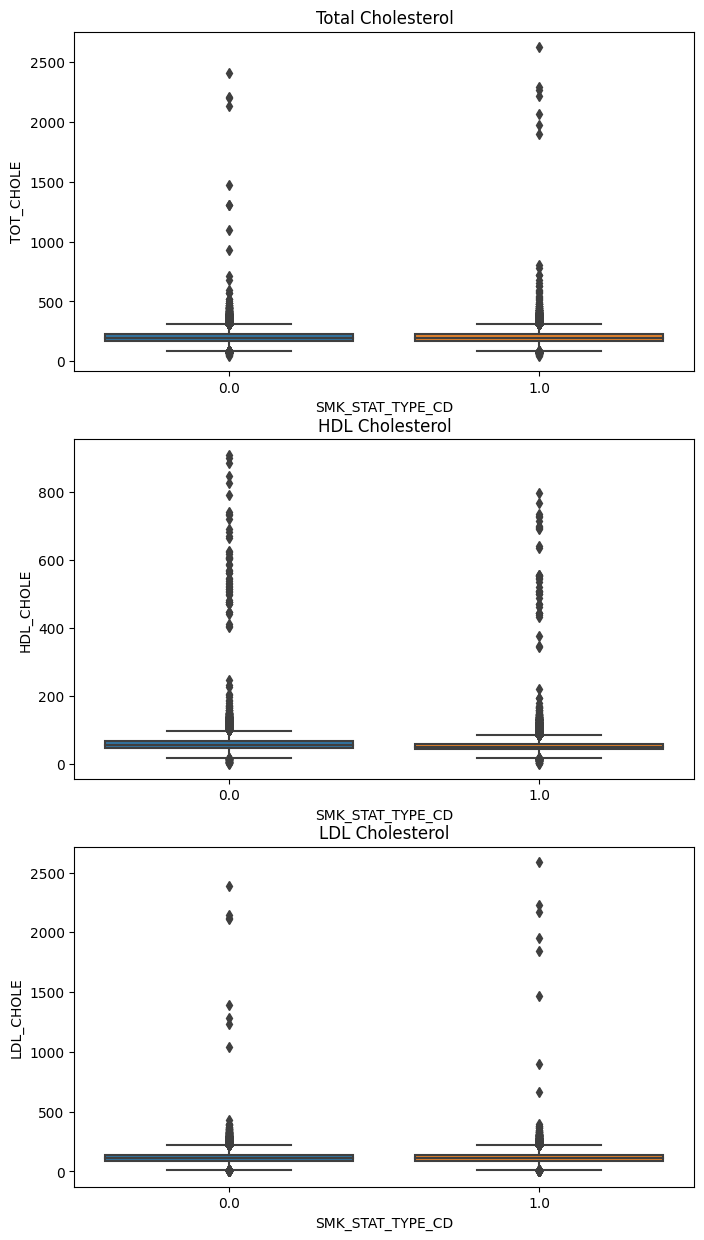

In [85]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='TOT_CHOLE', ax=axes[0])
axes[0].set_title('Total Cholesterol')

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='HDL_CHOLE', ax=axes[1])
axes[1].set_title('HDL Cholesterol')

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='LDL_CHOLE', ax=axes[2])
axes[2].set_title('LDL Cholesterol')

plt.show()

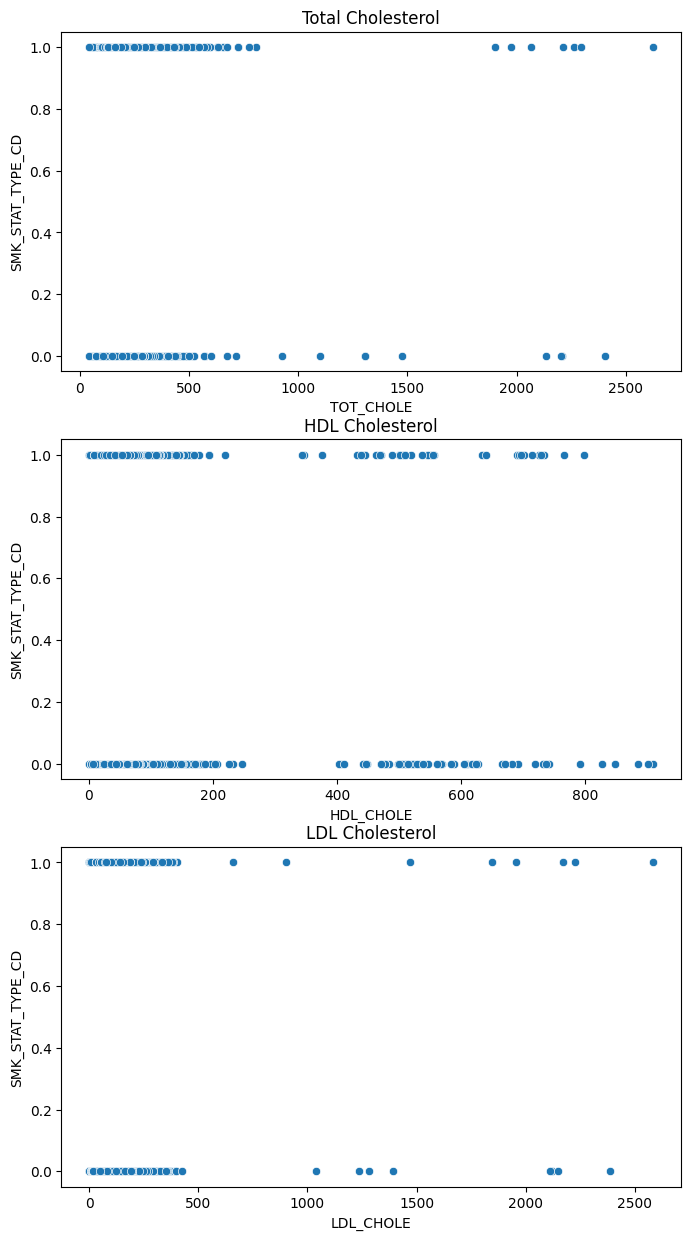

In [86]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

sns.scatterplot(data=analysis_data, y='SMK_STAT_TYPE_CD', x='TOT_CHOLE', ax=axes[0])
axes[0].set_title('Total Cholesterol')

sns.scatterplot(data=analysis_data, y='SMK_STAT_TYPE_CD', x='HDL_CHOLE', ax=axes[1])
axes[1].set_title('HDL Cholesterol')

sns.scatterplot(data=analysis_data, y='SMK_STAT_TYPE_CD', x='LDL_CHOLE', ax=axes[2])
axes[2].set_title('LDL Cholesterol')

plt.show()

In [87]:
analysis_data = analysis_data[(analysis_data['TOT_CHOLE'] <= 1000) & (analysis_data['LDL_CHOLE'] <= 1000)]
analysis_data = analysis_data.dropna()
analysis_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 417417 entries, 574465 to 999999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TOT_CHOLE         417417 non-null  float64
 1   HDL_CHOLE         417417 non-null  float64
 2   LDL_CHOLE         417417 non-null  float64
 3   SMK_STAT_TYPE_CD  417417 non-null  float64
dtypes: float64(4)
memory usage: 15.9 MB


In [88]:
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['TOT_CHOLE'].count())
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['TOT_CHOLE'].count())
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['HDL_CHOLE'].count())
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['HDL_CHOLE'].count())
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['LDL_CHOLE'].count())
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['LDL_CHOLE'].count())

272258
145159
272258
145159
272258
145159


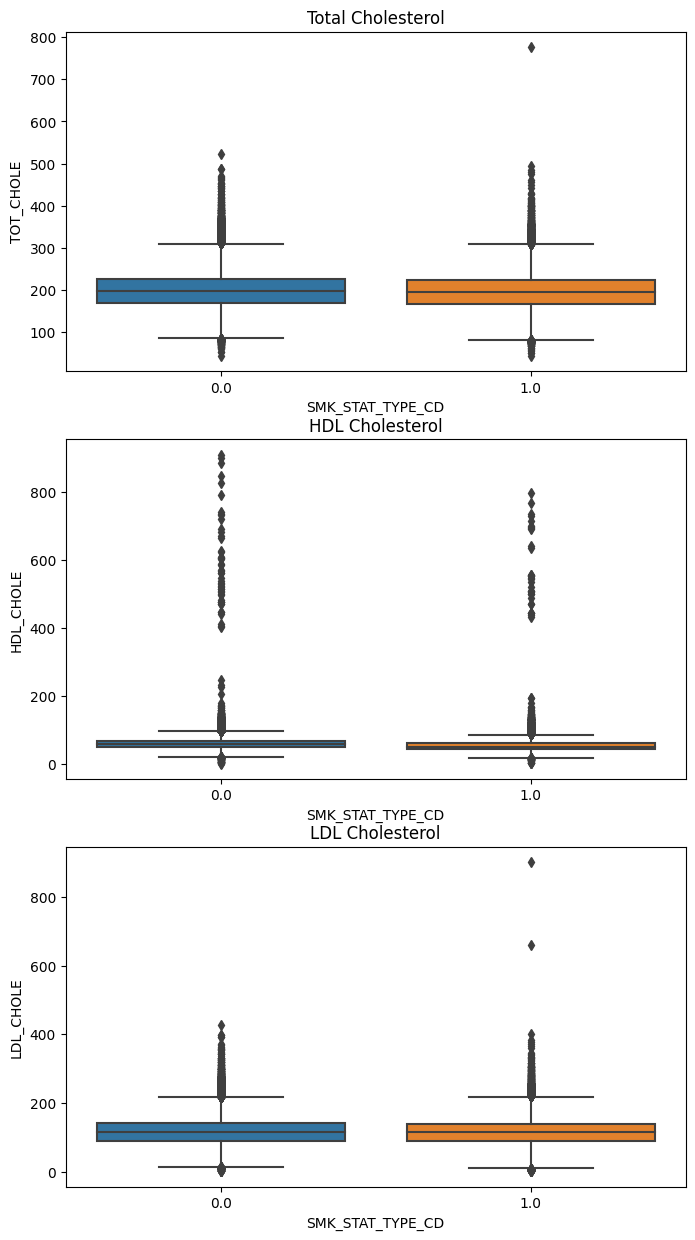

In [89]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='TOT_CHOLE', ax=axes[0])
axes[0].set_title('Total Cholesterol')

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='HDL_CHOLE', ax=axes[1])
axes[1].set_title('HDL Cholesterol')

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='LDL_CHOLE', ax=axes[2])
axes[2].set_title('LDL Cholesterol')

plt.show()

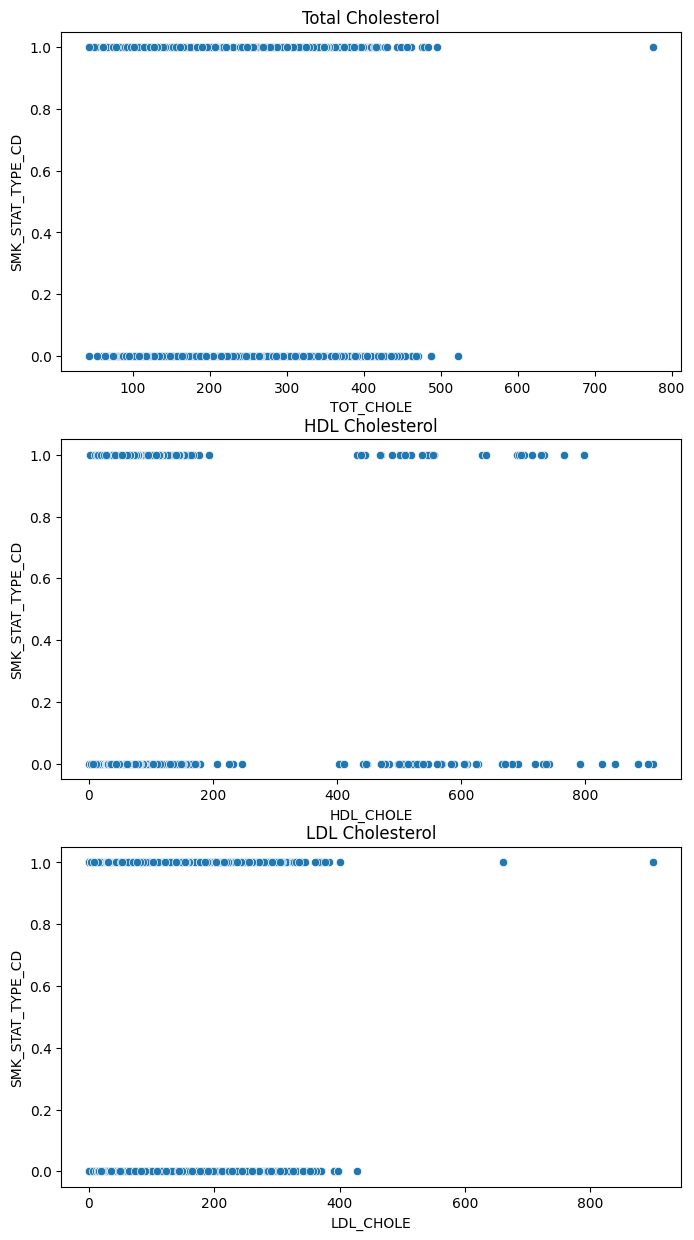

In [90]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

sns.scatterplot(data=analysis_data, y='SMK_STAT_TYPE_CD', x='TOT_CHOLE', ax=axes[0])
axes[0].set_title('Total Cholesterol')

sns.scatterplot(data=analysis_data, y='SMK_STAT_TYPE_CD', x='HDL_CHOLE', ax=axes[1])
axes[1].set_title('HDL Cholesterol')

sns.scatterplot(data=analysis_data, y='SMK_STAT_TYPE_CD', x='LDL_CHOLE', ax=axes[2])
axes[2].set_title('LDL Cholesterol')

plt.show()

In [91]:
#이전 scatter plot을 통해 눈에 보이는 Outlier 제거 위해 600으로 범위 줄임
analysis_data = analysis_data[(analysis_data['TOT_CHOLE'] <= 600) & (analysis_data['LDL_CHOLE'] <= 600)]
analysis_data = analysis_data.dropna()
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417415 entries, 574465 to 999999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TOT_CHOLE         417415 non-null  float64
 1   HDL_CHOLE         417415 non-null  float64
 2   LDL_CHOLE         417415 non-null  float64
 3   SMK_STAT_TYPE_CD  417415 non-null  float64
dtypes: float64(4)
memory usage: 15.9 MB


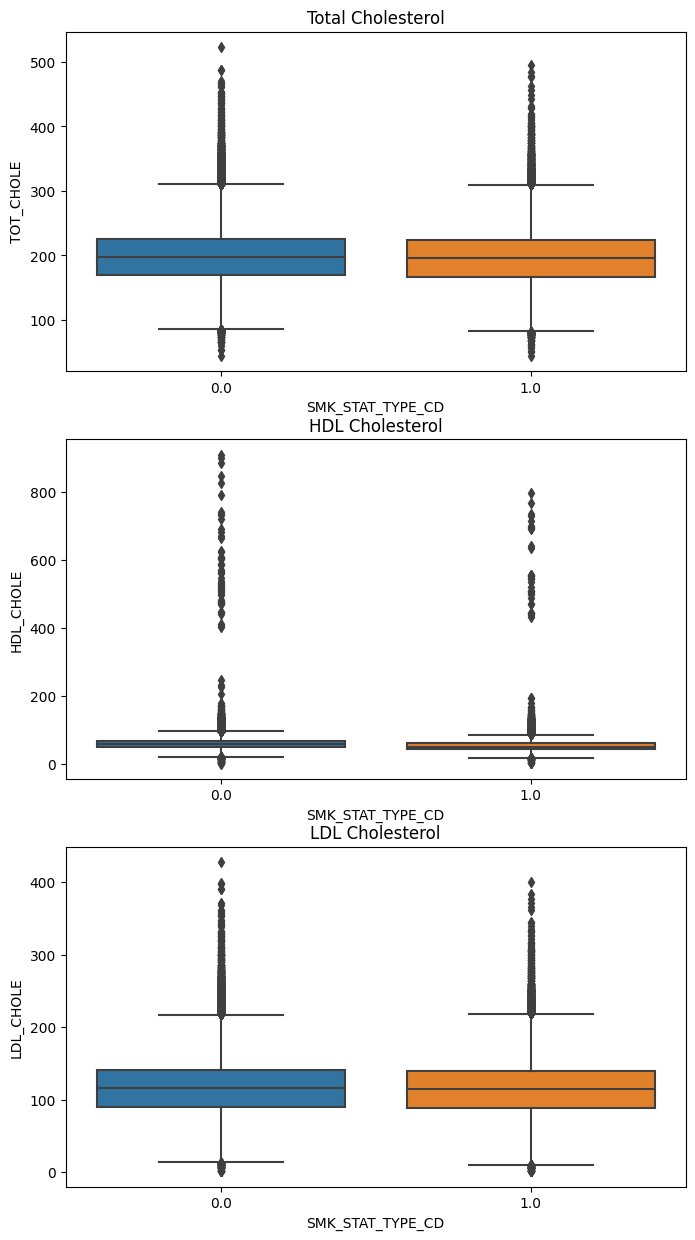

In [92]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='TOT_CHOLE', ax=axes[0])
axes[0].set_title('Total Cholesterol')

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='HDL_CHOLE', ax=axes[1])
axes[1].set_title('HDL Cholesterol')

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='LDL_CHOLE', ax=axes[2])
axes[2].set_title('LDL Cholesterol')

plt.show()

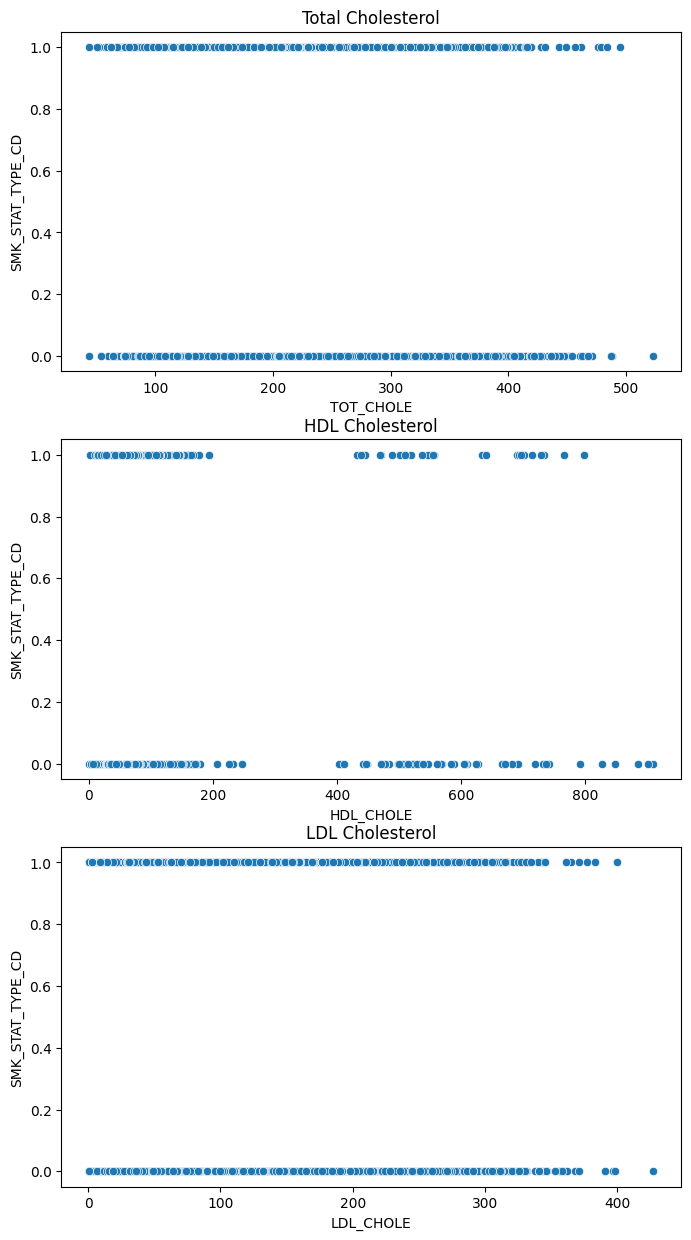

In [93]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

sns.scatterplot(data=analysis_data, y='SMK_STAT_TYPE_CD', x='TOT_CHOLE', ax=axes[0])
axes[0].set_title('Total Cholesterol')

sns.scatterplot(data=analysis_data, y='SMK_STAT_TYPE_CD', x='HDL_CHOLE', ax=axes[1])
axes[1].set_title('HDL Cholesterol')

sns.scatterplot(data=analysis_data, y='SMK_STAT_TYPE_CD', x='LDL_CHOLE', ax=axes[2])
axes[2].set_title('LDL Cholesterol')

plt.show()

In [94]:
print(data['SMK_STAT_TYPE_CD'].value_counts())

SMK_STAT_TYPE_CD
0.0    634530
1.0    365470
Name: count, dtype: int64


In [95]:
non_smoking_group_TOT_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['TOT_CHOLE'].sample(n=5000, random_state=10)
smoking_group_TOT_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['TOT_CHOLE'].sample(n=5000, random_state=10)
non_smoking_group_HDL_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['HDL_CHOLE'].sample(n=5000, random_state=10)
smoking_group_HDL_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['HDL_CHOLE'].sample(n=5000, random_state=10)
non_smoking_group_LDL_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['LDL_CHOLE'].sample(n=5000, random_state=10)
smoking_group_LDL_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['LDL_CHOLE'].sample(n=5000, random_state=10)

### 흡연자, 비흡연자 Total Cholesterol 비교

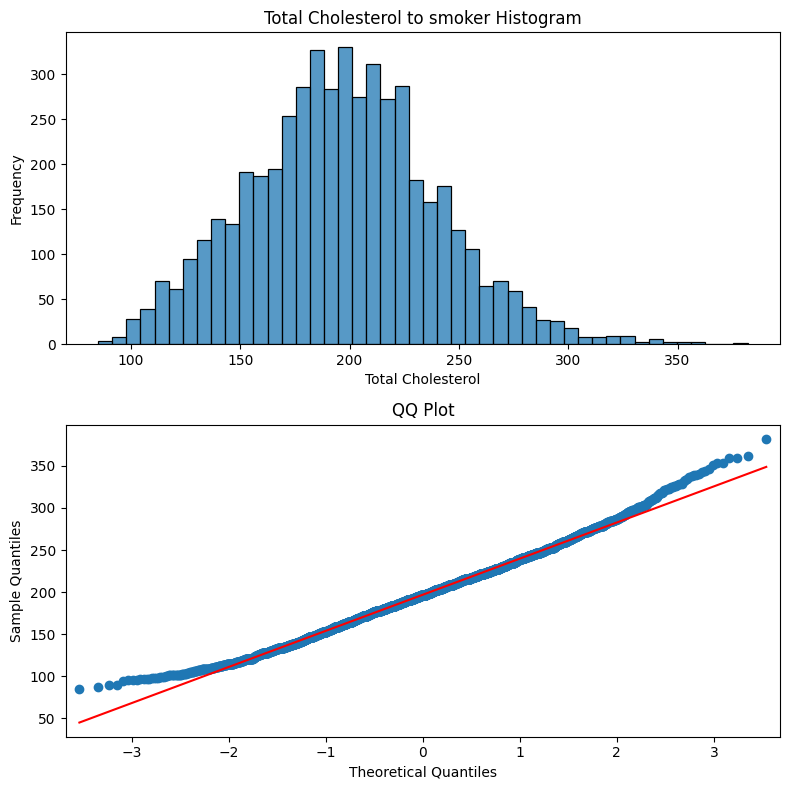

In [96]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(smoking_group_TOT_CHOLE,ax=ax1)
ax1.set_xlabel('Total Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('Total Cholesterol to smoker Histogram')

sm.qqplot(smoking_group_TOT_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

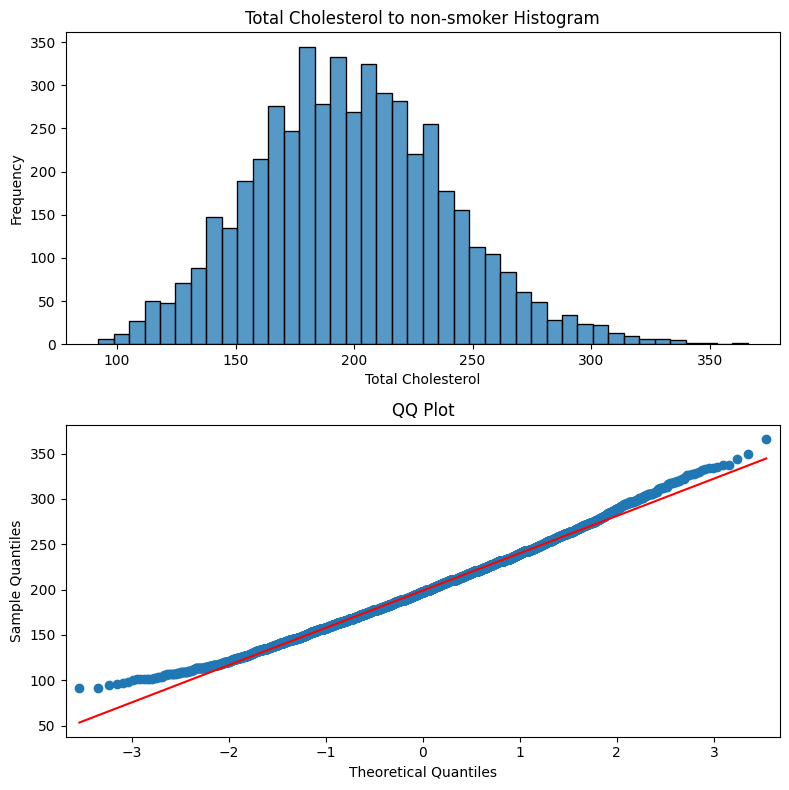

In [97]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(non_smoking_group_TOT_CHOLE,ax=ax1)
ax1.set_xlabel('Total Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('Total Cholesterol to non-smoker Histogram')

sm.qqplot(non_smoking_group_TOT_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

In [98]:
# normality test
print('shapiro test')
print(scipy.stats.shapiro(smoking_group_TOT_CHOLE))
print(scipy.stats.shapiro(non_smoking_group_TOT_CHOLE))

print('\nKS test')
print(scipy.stats.kstest(smoking_group_TOT_CHOLE, 'norm'))
print(scipy.stats.kstest(non_smoking_group_TOT_CHOLE, 'norm'))

#정규성을 따르지않는다는걸 확인할 수 있다.

#Eqaul Variance test
print('\nEqual variance - levene test')
print(scipy.stats.levene(smoking_group_TOT_CHOLE, non_smoking_group_TOT_CHOLE))
#두 그룹 Equal variance 따른다.

print('\nRank sum test')
print(scipy.stats.ranksums(smoking_group_TOT_CHOLE, non_smoking_group_TOT_CHOLE))

shapiro test
ShapiroResult(statistic=0.9948675036430359, pvalue=2.475381228120299e-12)
ShapiroResult(statistic=0.9948495626449585, pvalue=2.320725859747408e-12)

KS test
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=85.0, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=92.0, statistic_sign=-1)

Equal variance - levene test
LeveneResult(statistic=5.036823075152405, pvalue=0.024835742534354287)

Rank sum test
RanksumsResult(statistic=-2.119543162777798, pvalue=0.034044590050462946)


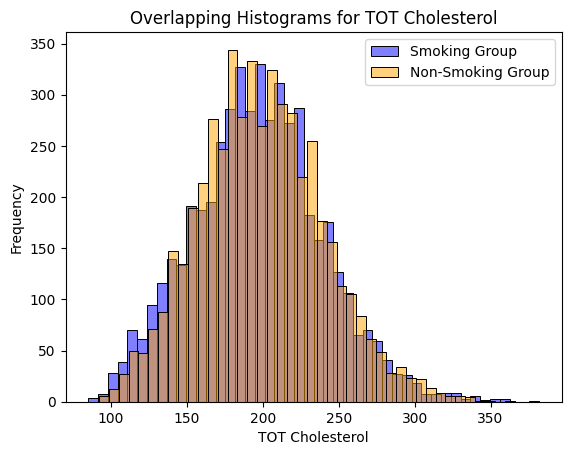

In [99]:
fig, ax = plt.subplots()
sns.histplot(smoking_group_TOT_CHOLE, ax=ax, label='Smoking Group', color='blue', alpha=0.5)
sns.histplot(non_smoking_group_TOT_CHOLE, ax=ax, label='Non-Smoking Group', color='orange', alpha=0.5)
ax.set_xlabel('TOT Cholesterol')
ax.set_ylabel('Frequency')
ax.set_title('Overlapping Histograms for TOT Cholesterol')
ax.legend()
plt.show()

### 흡연자, 비흡연자 HDL Cholesterol 비교

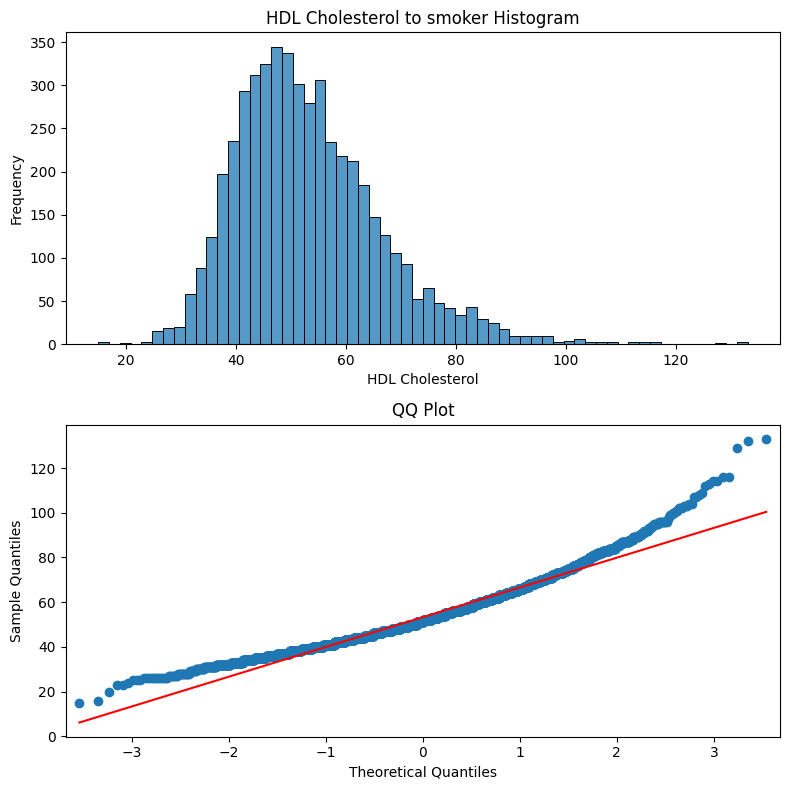

In [100]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(smoking_group_HDL_CHOLE,ax=ax1)
ax1.set_xlabel('HDL Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('HDL Cholesterol to smoker Histogram')

sm.qqplot(smoking_group_HDL_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

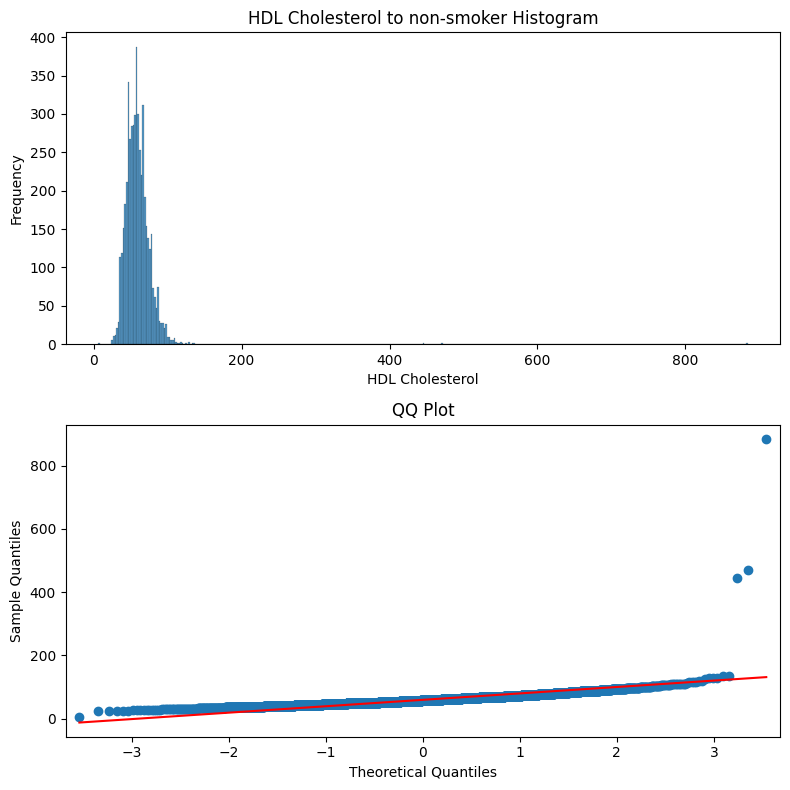

In [101]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(non_smoking_group_HDL_CHOLE,ax=ax1)
ax1.set_xlabel('HDL Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('HDL Cholesterol to non-smoker Histogram')

sm.qqplot(non_smoking_group_HDL_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

In [102]:
# normality test
print('shapiro test')
print(scipy.stats.shapiro(smoking_group_HDL_CHOLE))
print(scipy.stats.shapiro(non_smoking_group_HDL_CHOLE))

print('\nKS test')
print(scipy.stats.kstest(smoking_group_HDL_CHOLE, 'norm'))
print(scipy.stats.kstest(non_smoking_group_HDL_CHOLE, 'norm'))

#정규성을 따르지않는다는걸 확인할 수 있다.

#Eqaul Variance test
print('\nEqual variance - levene test')
print(scipy.stats.levene(smoking_group_HDL_CHOLE, non_smoking_group_HDL_CHOLE))
#두 그룹 Equal variance 따르지 않는다.

print('\nRank sum test')
print(scipy.stats.ranksums(smoking_group_HDL_CHOLE, non_smoking_group_HDL_CHOLE))



shapiro test
ShapiroResult(statistic=0.9592832922935486, pvalue=2.7195104854162446e-35)
ShapiroResult(statistic=0.5815354585647583, pvalue=0.0)

KS test
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=15.0, statistic_sign=-1)
KstestResult(statistic=0.9999999990134123, pvalue=0.0, statistic_location=6.0, statistic_sign=-1)

Equal variance - levene test
LeveneResult(statistic=28.582488353994584, pvalue=9.17692163398863e-08)

Rank sum test
RanksumsResult(statistic=-21.68173600301787, pvalue=3.0515022103376435e-104)


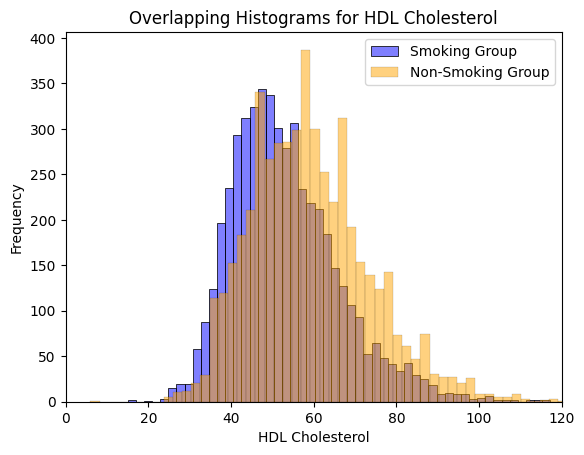

In [103]:
fig, ax = plt.subplots()
sns.histplot(smoking_group_HDL_CHOLE, ax=ax, label='Smoking Group', color='blue', alpha=0.5)
sns.histplot(non_smoking_group_HDL_CHOLE, ax=ax, label='Non-Smoking Group', color='orange', alpha=0.5)
ax.set_xlim(0, 120)
ax.set_xlabel('HDL Cholesterol')
ax.set_ylabel('Frequency')
ax.set_title('Overlapping Histograms for HDL Cholesterol')
ax.legend()
plt.show()

### 흡연자, 비흡연자 LDL Cholesterol 비교

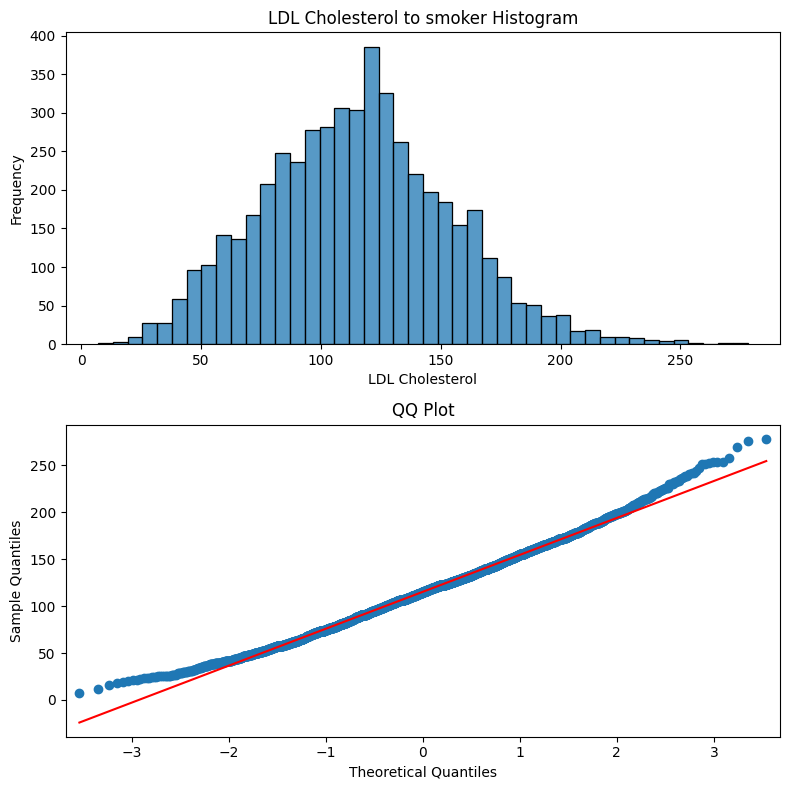

In [104]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(smoking_group_LDL_CHOLE,ax=ax1)
ax1.set_xlabel('LDL Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('LDL Cholesterol to smoker Histogram')

sm.qqplot(smoking_group_LDL_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

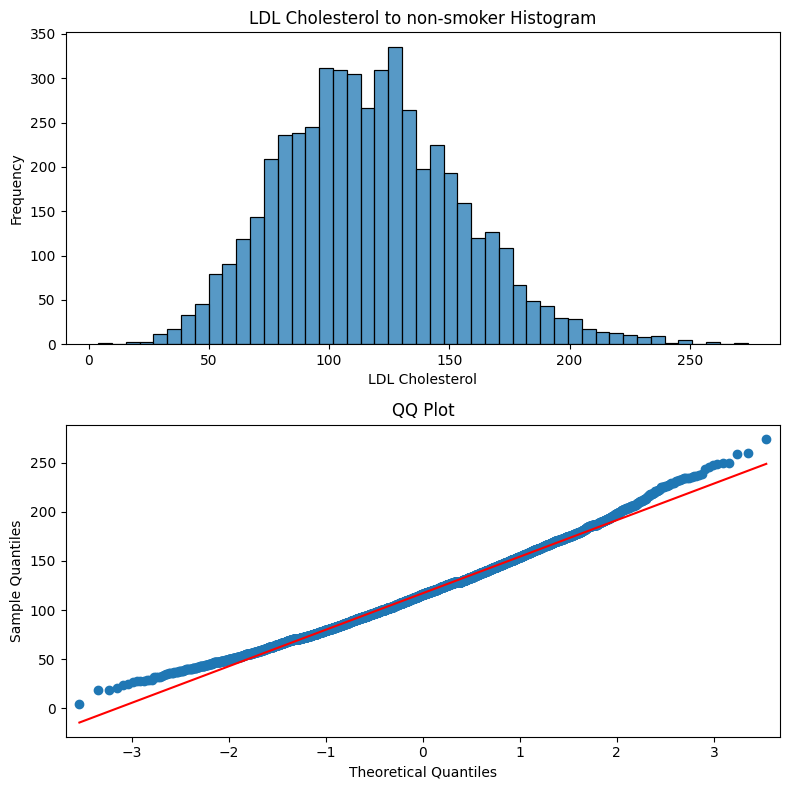

In [105]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(non_smoking_group_LDL_CHOLE,ax=ax1)
ax1.set_xlabel('LDL Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('LDL Cholesterol to non-smoker Histogram')

sm.qqplot(non_smoking_group_LDL_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

In [106]:
# normality test
print('shapiro test')
print(scipy.stats.shapiro(smoking_group_LDL_CHOLE))
print(scipy.stats.shapiro(non_smoking_group_LDL_CHOLE))

print('\nKS test')
print(scipy.stats.kstest(smoking_group_LDL_CHOLE, 'norm'))
print(scipy.stats.kstest(non_smoking_group_LDL_CHOLE, 'norm'))

#정규성을 따르지않는다는걸 확인할 수 있다.

#Eqaul Variance test
print('\nEqual variance - levene test')
print(scipy.stats.levene(smoking_group_LDL_CHOLE, non_smoking_group_LDL_CHOLE))
#두 그룹 Equal variance 따른다.

print('\nRank sum test')
print(scipy.stats.ranksums(smoking_group_LDL_CHOLE, non_smoking_group_LDL_CHOLE))

shapiro test
ShapiroResult(statistic=0.9949311017990112, pvalue=3.115686961902009e-12)
ShapiroResult(statistic=0.9923900961875916, pvalue=1.0076464876797135e-15)

KS test
KstestResult(statistic=0.9999999999987201, pvalue=0.0, statistic_location=7.0, statistic_sign=-1)
KstestResult(statistic=0.9999683287581669, pvalue=0.0, statistic_location=4.0, statistic_sign=-1)

Equal variance - levene test
LeveneResult(statistic=12.410893019129016, pvalue=0.00042874196168576114)

Rank sum test
RanksumsResult(statistic=-2.0080150593409765, pvalue=0.04464169141929508)


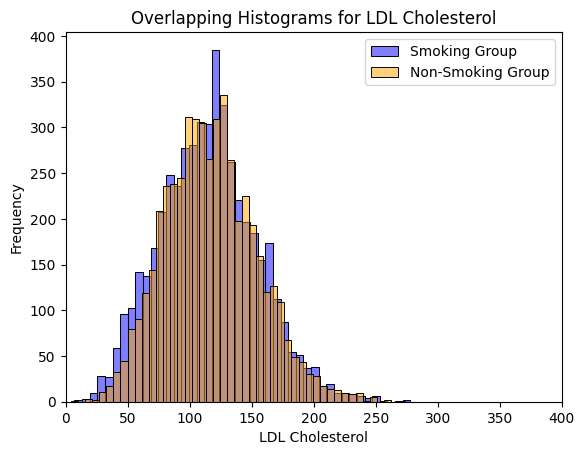

In [107]:
fig, ax = plt.subplots()
sns.histplot(smoking_group_LDL_CHOLE, ax=ax, label='Smoking Group', color='blue', alpha=0.5)
sns.histplot(non_smoking_group_LDL_CHOLE, ax=ax, label='Non-Smoking Group', color='orange', alpha=0.5)
ax.set_xlim(0, 400)
ax.set_xlabel('LDL Cholesterol')
ax.set_ylabel('Frequency')
ax.set_title('Overlapping Histograms for LDL Cholesterol')
ax.legend()
plt.show()

Correlation between TOT_CHOLE and SMK_STAT_TYPE_CD: -0.03170448203174596
Correlation between HDL_CHOLE and SMK_STAT_TYPE_CD: -0.1708636877373202
Correlation between LDL_CHOLE and SMK_STAT_TYPE_CD: -0.028508699324167417


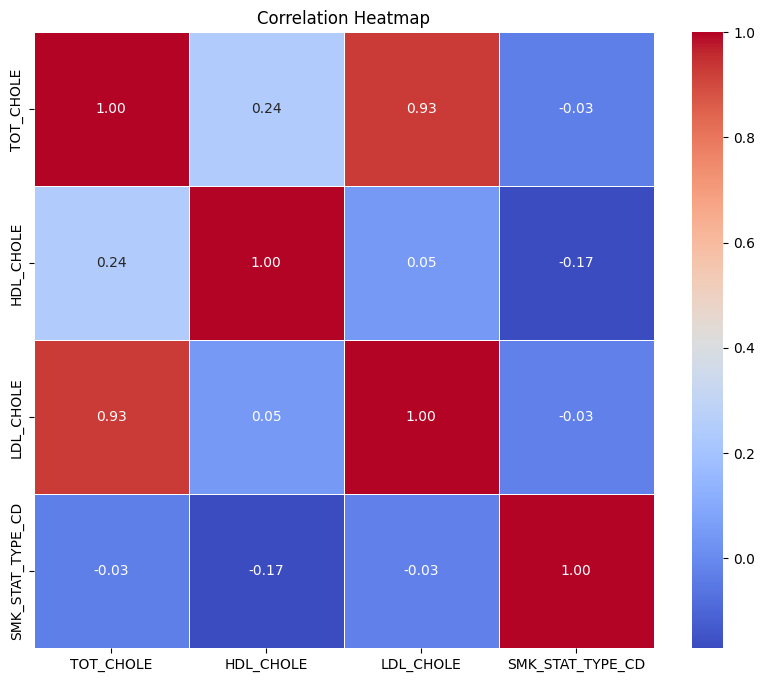

In [108]:
# 각 변수와 흡연 상태 간의 상관관계 계산
correlation_tot_chole = analysis_data['TOT_CHOLE'].corr(analysis_data['SMK_STAT_TYPE_CD'])
correlation_hdl_chole = analysis_data['HDL_CHOLE'].corr(analysis_data['SMK_STAT_TYPE_CD'])
correlation_ldl_chole = analysis_data['LDL_CHOLE'].corr(analysis_data['SMK_STAT_TYPE_CD'])

print(f'Correlation between TOT_CHOLE and SMK_STAT_TYPE_CD: {correlation_tot_chole}')
print(f'Correlation between HDL_CHOLE and SMK_STAT_TYPE_CD: {correlation_hdl_chole}')
print(f'Correlation between LDL_CHOLE and SMK_STAT_TYPE_CD: {correlation_ldl_chole}')

# 변수들 간의 상관관계 히트맵 그리기
correlation_matrix = analysis_data[['TOT_CHOLE', 'HDL_CHOLE', 'LDL_CHOLE', 'SMK_STAT_TYPE_CD']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [109]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# 라벨 인코더 생성
label_encoder = LabelEncoder()

# 회귀분석을 위한 데이터프레임 생성
X = analysis_data[['TOT_CHOLE', 'HDL_CHOLE', 'LDL_CHOLE']]
X = sm.add_constant(X)  # 상수항 추가

# 타겟 변수 변환
y = label_encoder.fit_transform(analysis_data['SMK_STAT_TYPE_CD'])

# 로지스틱 회귀분석 모델 피팅
model = sm.Logit(y, X).fit()

# 로지스틱 회귀분석 결과 출력
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.620186
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               417415
Model:                          Logit   Df Residuals:                   417411
Method:                           MLE   Df Model:                            3
Date:                Fri, 15 Dec 2023   Pseudo R-squ.:                 0.04003
Time:                        14:29:26   Log-Likelihood:            -2.5887e+05
converged:                       True   LL-Null:                   -2.6967e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2132      0.020     10.405      0.000       0.173       0.253
TOT_CHOLE      0.0202      0.

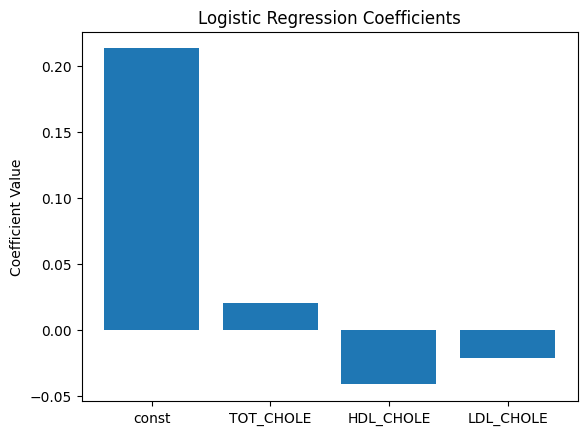

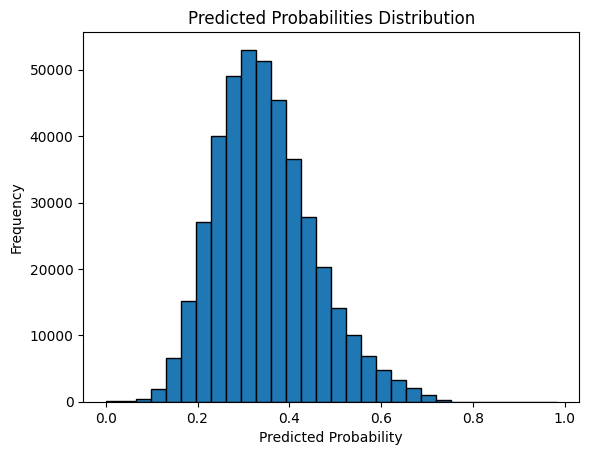

In [110]:
# 계수 시각화
coef_names = ['const', 'TOT_CHOLE', 'HDL_CHOLE', 'LDL_CHOLE']
coef_values = [0.2132, 0.0202, -0.0416, -0.0214]

plt.bar(coef_names, coef_values)
plt.title('Logistic Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.show()

# 예측 확률 시각화
predicted_probs = model.predict(X)
plt.hist(predicted_probs, bins=30, edgecolor='black')
plt.title('Predicted Probabilities Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()
